In [23]:
# the key idea is that instead of doing L2 training we do sobolev training ! 

# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: percent
#       format_version: '1.3'
#       jupytext_version: 1.17.2
#   kernelspec:
#     display_name: .venv
#     language: python
#     name: python3
# ---

In [24]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sciml.data.preprocessing.process_given_dataset import get_mu_xs_sol

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [25]:
d_p = 20
d_V = 20
epochs = 10

In [26]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(100,)),
    tf.keras.layers.Reshape((100, 1)),  # we reshape to (batch, 100, 1)
    tf.keras.layers.Conv1D(128, kernel_size=5, activation='elu', padding='same'),
    tf.keras.layers.Conv1D(128, kernel_size=5, activation='elu', padding='same'),
    tf.keras.layers.Conv1D(32, kernel_size=5, activation='elu', padding='same'),
    tf.keras.layers.GlobalAveragePooling1D(),  # we aggregate to (batch, 32)
    tf.keras.layers.Dense(d_V, activation='elu')  # we output d_V features
])

external_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(1,)),
    tf.keras.layers.Reshape((1, 1)),  # we reshape to (batch, 1, 1) for Conv1D
    tf.keras.layers.Conv1D(32, kernel_size=1, activation='elu'),  # we use kernel_size=1
    tf.keras.layers.Conv1D(32, kernel_size=1, activation='elu'),  # we use kernel_size=1
    tf.keras.layers.Flatten(),  # we flatten back to (batch, 32)
    tf.keras.layers.Dense(d_V, activation='elu')  # we output d_V features
])

coeff = tf.constant([-0.01,0.2,0],dtype=tf.float32)
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"pinn_order":2,"pinn_coeff": coeff,"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs,"learning_rate":0.002},folder_path="/home/janis/SCIML/summerschool/data/benchmarks/given/")

2025-08-05 20:58:04,327 - sciml.model.deeponet.deeponet - INFO - Model initialized with 10 epochs, 32 batch size, 0.002 learning rate


In [27]:


# now we need to do sobolev training with custom function knowing the PDE

In [28]:
folder_path = "/home/janis/SCIML/summerschool/data/benchmarks/given/"
coeff = tf.constant([-0.01,0.2,0],dtype=tf.float32)

In [29]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"pinn_order":2,"pinn_coeff": coeff,"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs},folder_path="/home/janis/SCIML/summerschool/data/benchmarks/given/")

2025-08-05 20:58:04,388 - sciml.model.deeponet.deeponet - INFO - Model initialized with 10 epochs, 32 batch size, 0.001 learning rate


In [30]:
mus, xs, sol = get_mu_xs_sol(folder_path,0.2)

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


In [31]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(2000, 100)
(2000, 100, 1)
(2000, 100)


mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]I0000 00:00:1754441885.030307   78079 cuda_dnn.cc:529] Loaded cuDNN version 90501
2025-08-05 20:58:13,658 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:58:13,660 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.062693
2025-08-05 20:58:13,661 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.064460
Training progress:  10%|█         | 1/10 [00:08<01:18,  8.69s/it]2025-08-05 20:58:18.618671: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-08-05 20:58:18,982 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:58:18,983 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.061999
2025-08-05 20:58:18,984 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.064373
Training progress:  20%|██        | 2/10 [00:14<00:53,  6.71s/it]2025-08-05 20:58:24,134 - sciml.model.deeponet.deeponet - INFO - Epoch 3/10
20

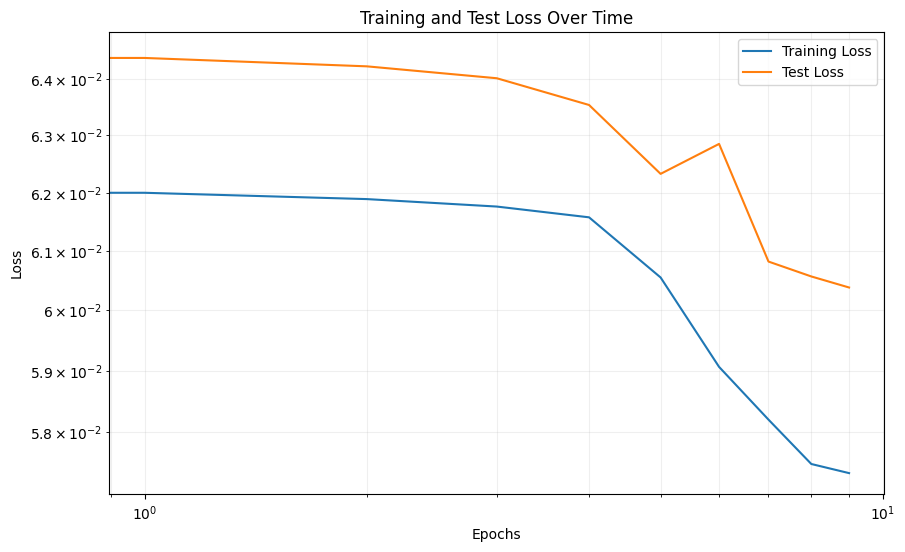

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


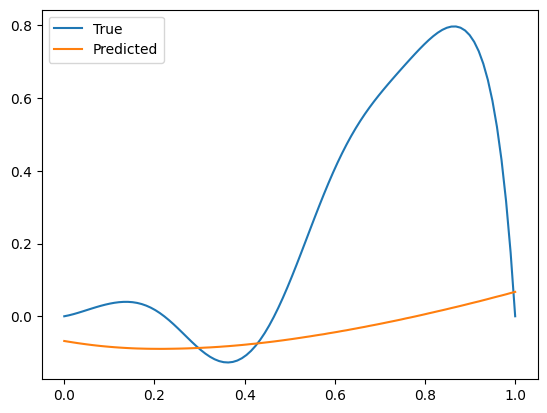

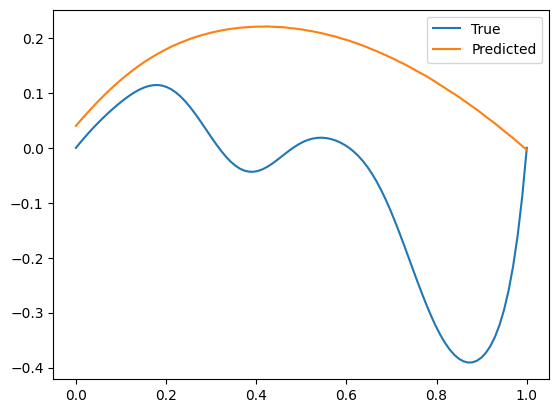

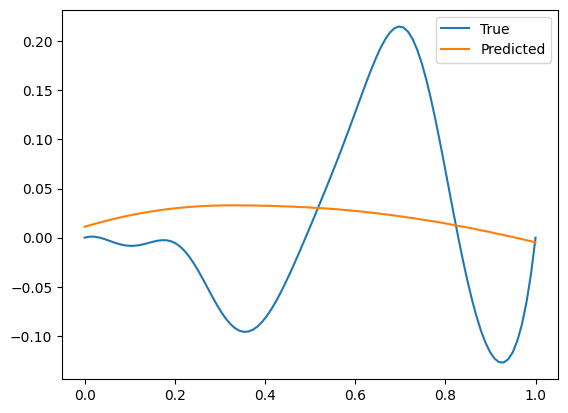

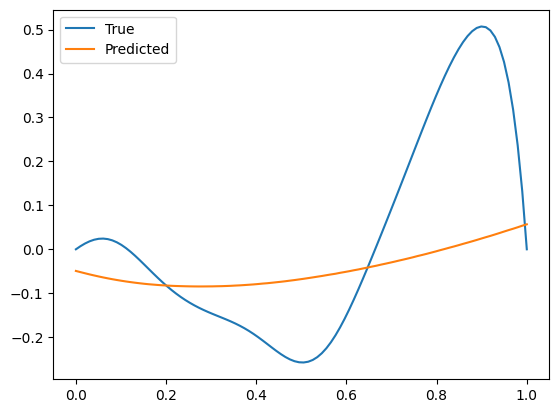

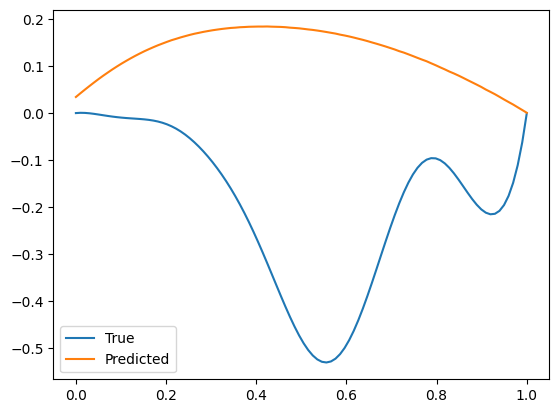

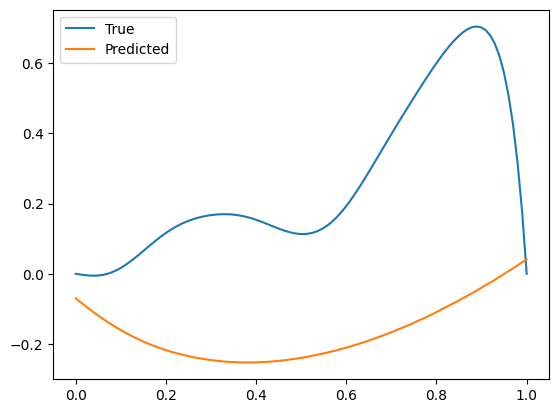

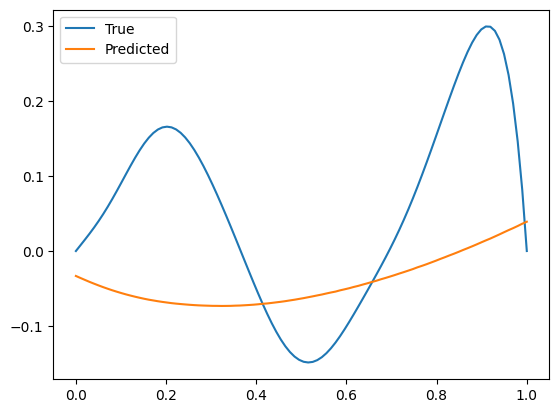

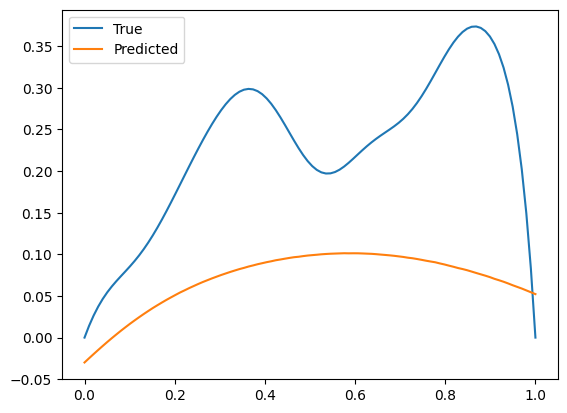

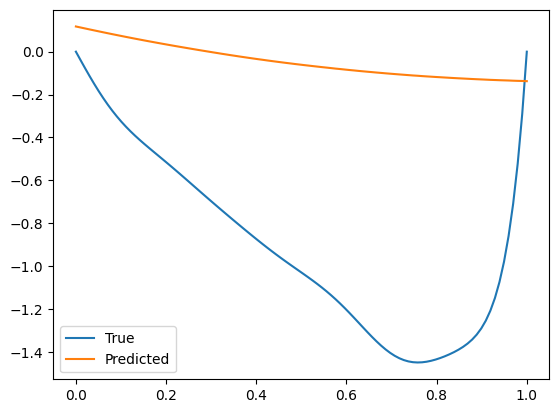

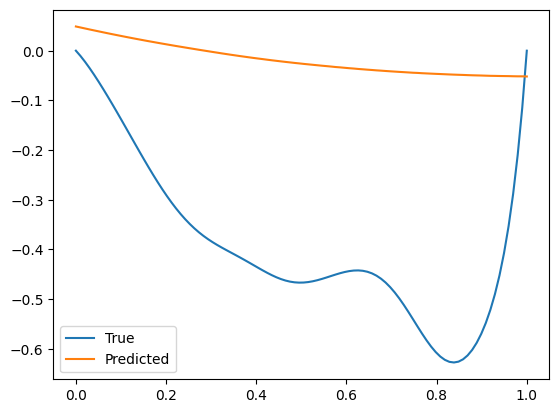

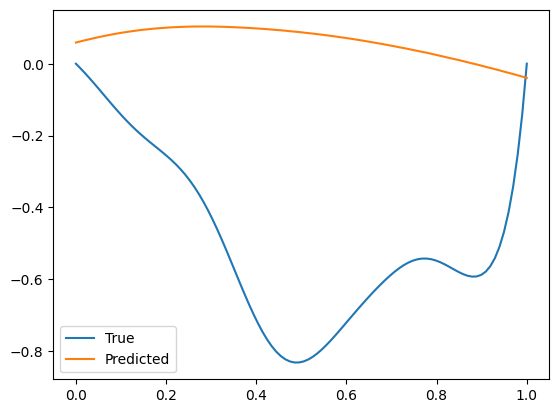

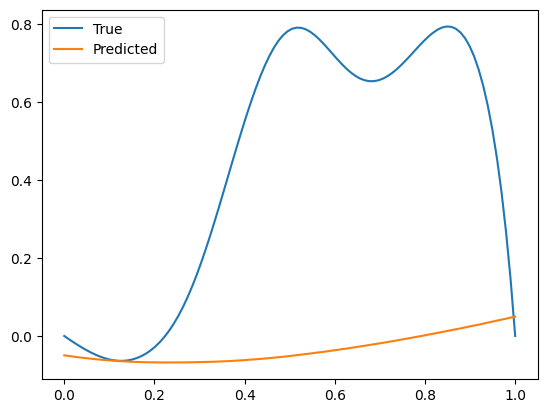

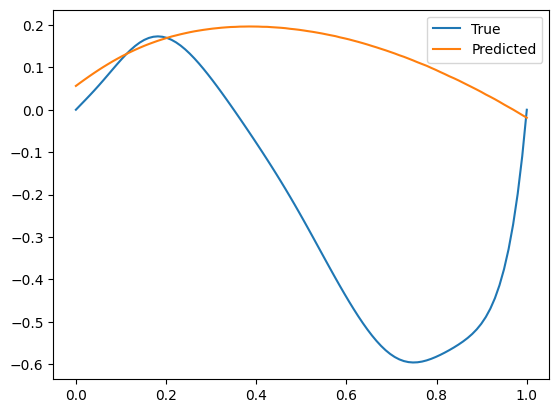

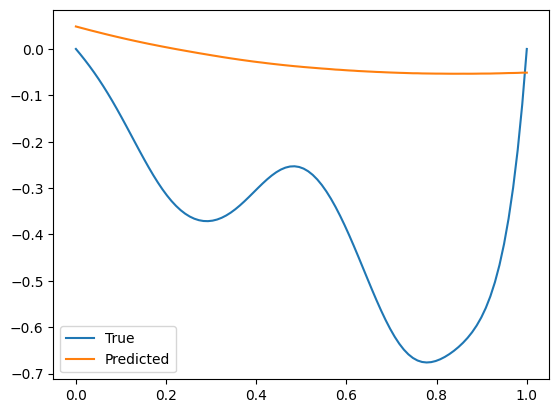

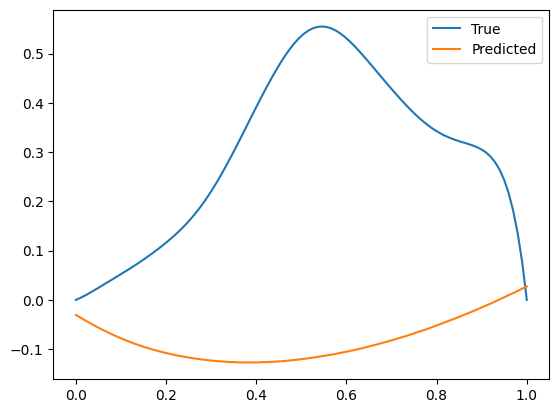

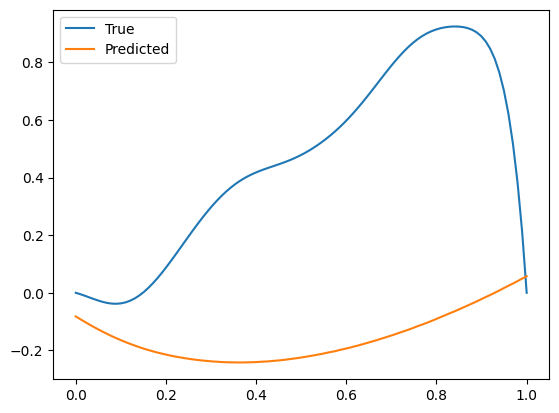

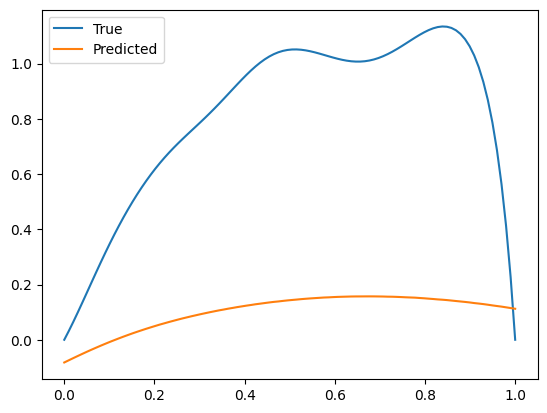

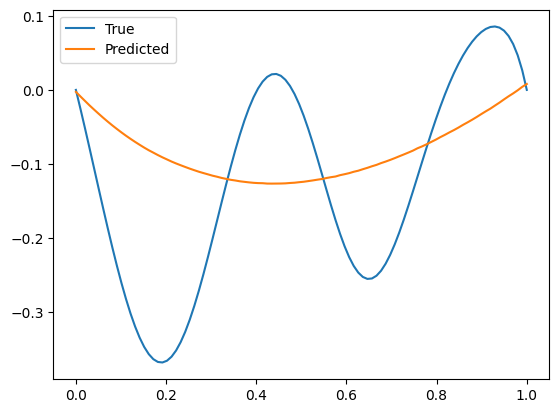

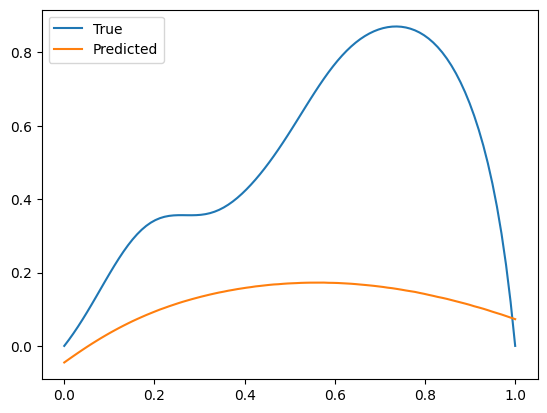

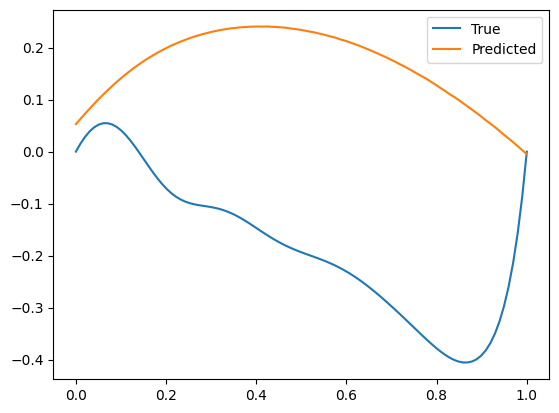

mus.shape (2000, 100)
xs.shape (2000, 100, 1)
sol.shape (2000, 100)


Training progress:   0%|          | 0/10 [00:00<?, ?it/s]2025-08-05 20:59:13,035 - sciml.model.deeponet.deeponet - INFO - Epoch 1/10
2025-08-05 20:59:13,036 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.057347
2025-08-05 20:59:13,037 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.059511
Training progress:  10%|█         | 1/10 [00:05<00:50,  5.59s/it]2025-08-05 20:59:18,974 - sciml.model.deeponet.deeponet - INFO - Epoch 2/10
2025-08-05 20:59:18,975 - sciml.model.deeponet.deeponet - INFO - Training Loss: 0.057128
2025-08-05 20:59:18,976 - sciml.model.deeponet.deeponet - INFO - Test Loss: 0.059237
Training progress:  20%|██        | 2/10 [00:15<01:01,  7.74s/it]


KeyboardInterrupt: 

In [32]:
for _ in range(10):
    train_history = model.fit()
    plt.figure(figsize=(10,6))
    plt.plot(train_history[0], label='Training Loss')  # we plot training loss
    plt.plot(train_history[1], label='Test Loss')  # we plot test loss
    plt.yscale('log')  # we use log scale for better visualization
    plt.grid(True, which="both", ls="-", alpha=0.2)  # we add grid with transparency
    plt.xlabel('Epochs')  # we add x label
    plt.ylabel('Loss')  # we add y label
    plt.title('Training and Test Loss Over Time')  # we add title
    plt.legend()  # we add legend
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
        
        # then we can test the model
    mu_test, xs_test, sol_test = get_mu_xs_sol(folder_path,0.2,training=False)

    preds = model.predict(mu_test, xs_test)
    for i in range(20):
        plt.plot(xs_test[i,:],sol_test[i,:], label='True')
        plt.plot(xs_test[i,:],preds[i,:], label='Predicted')
        plt.legend()
        plt.show()

mus.shape (100, 100)
xs.shape (100, 100, 1)
sol.shape (100, 100)


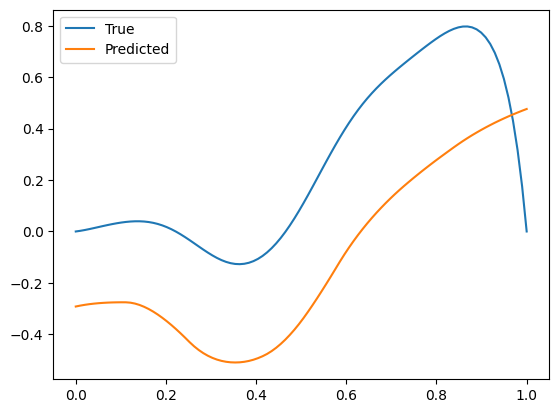

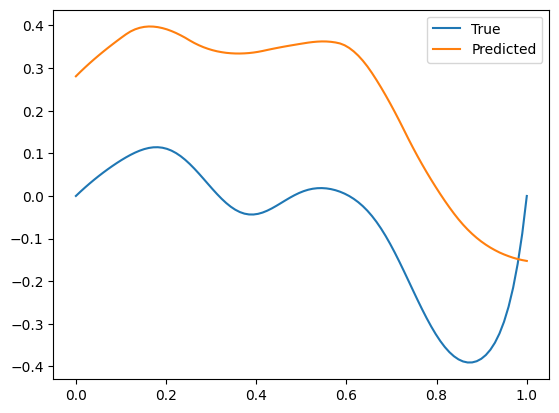

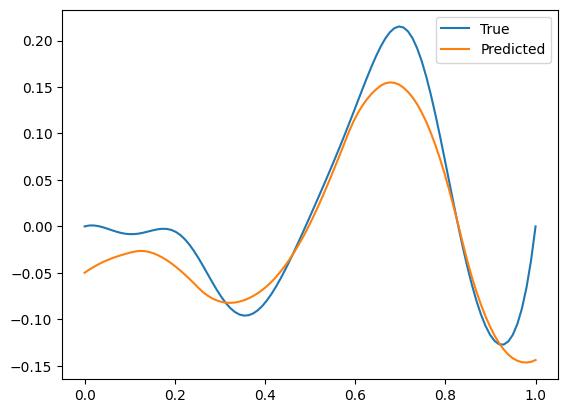

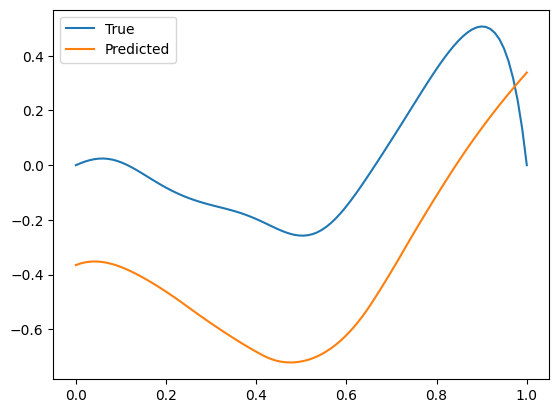

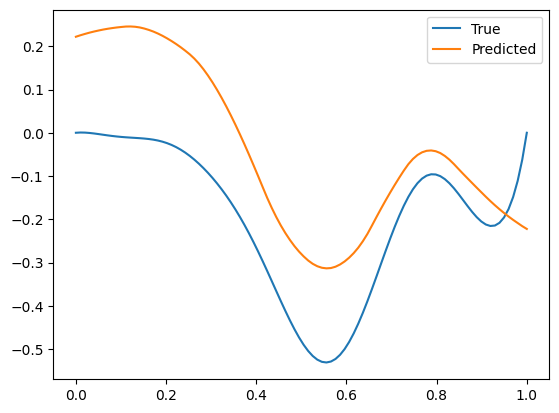

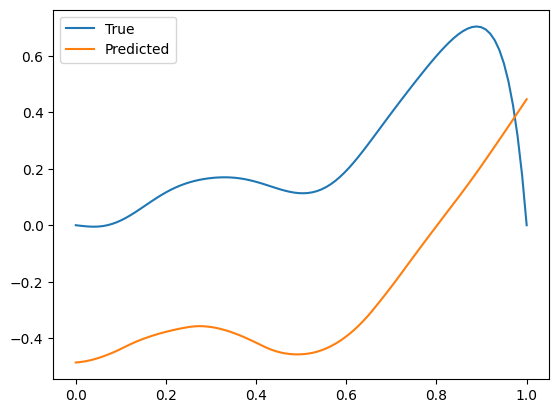

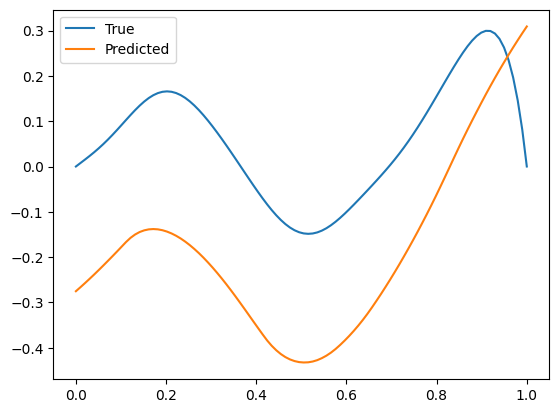

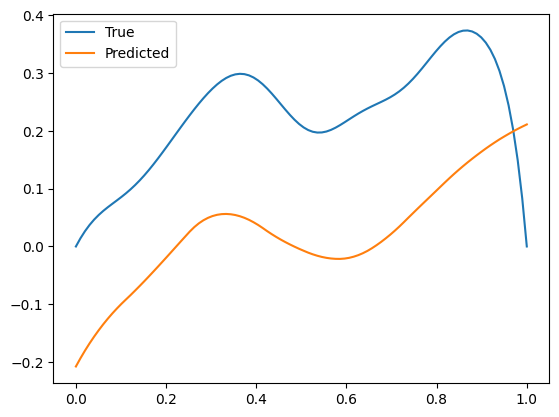

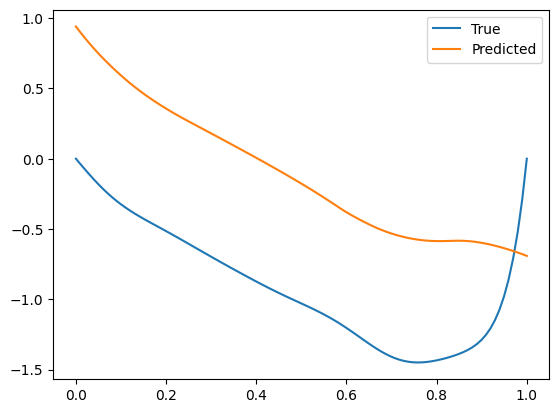

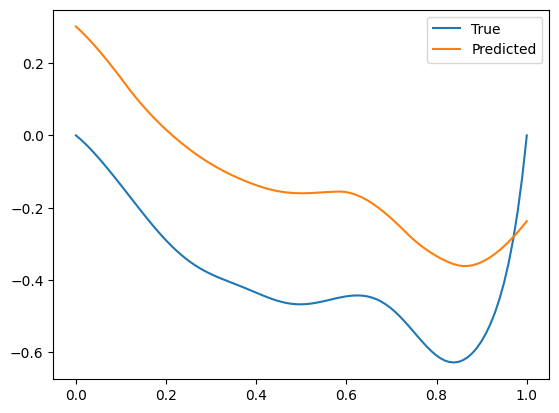

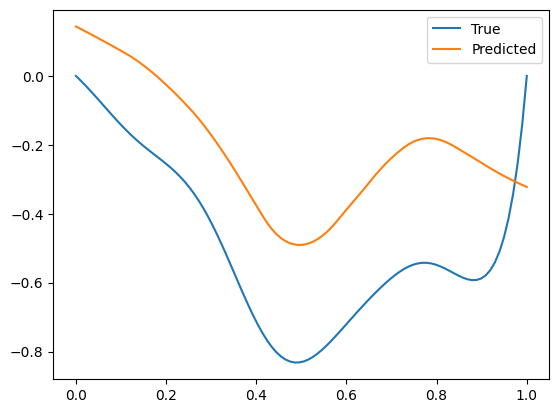

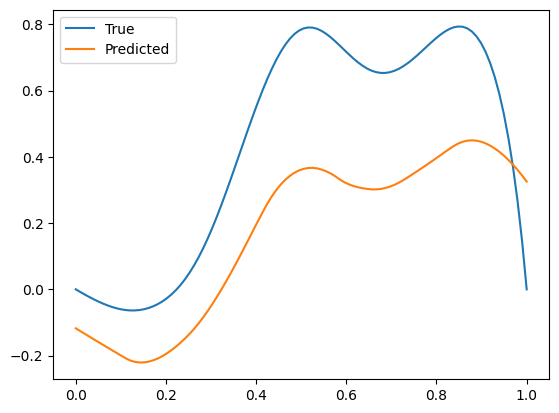

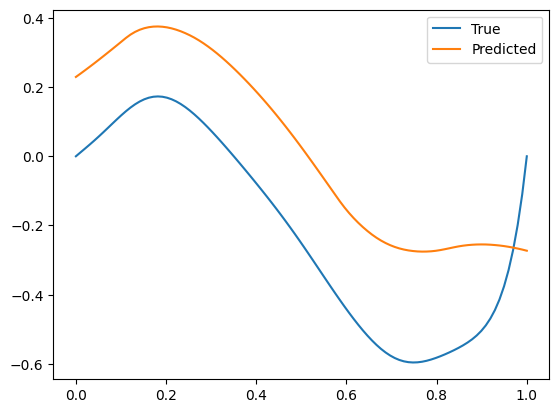

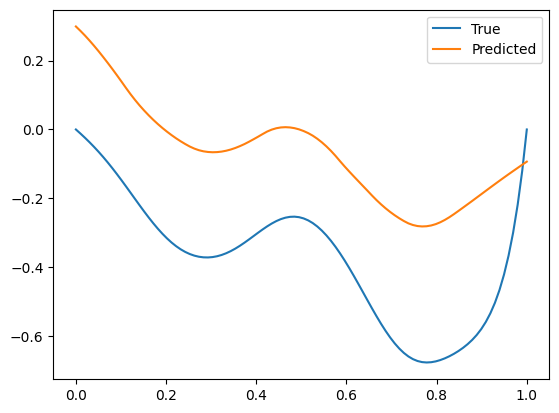

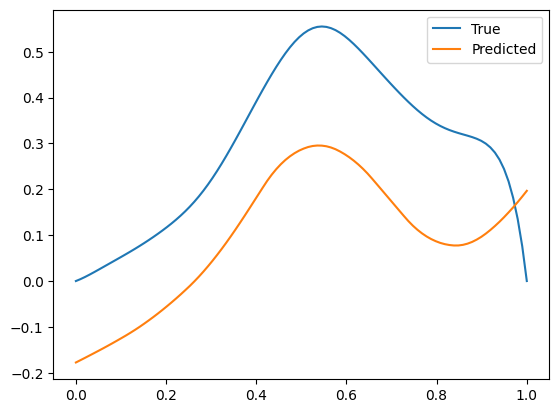

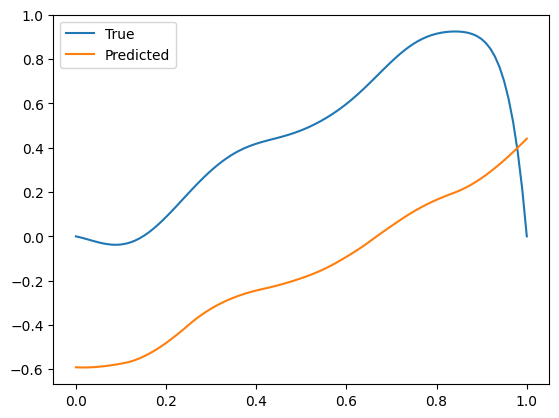

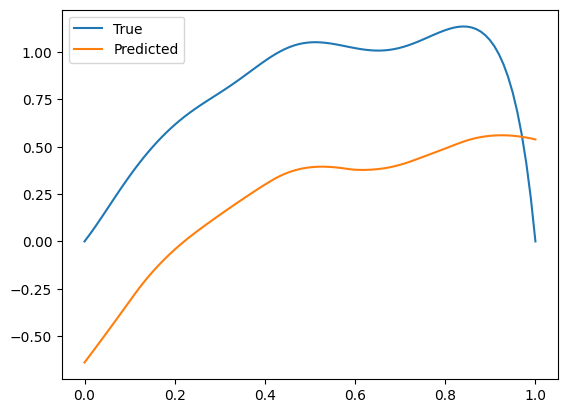

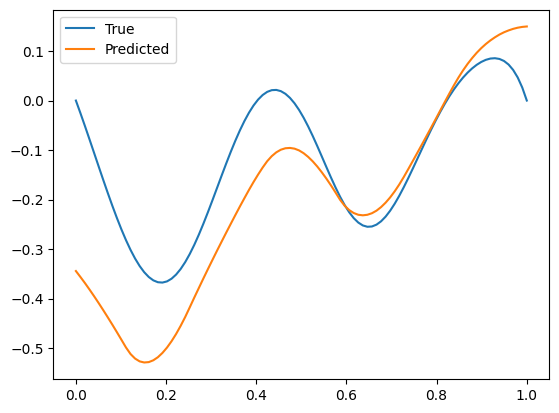

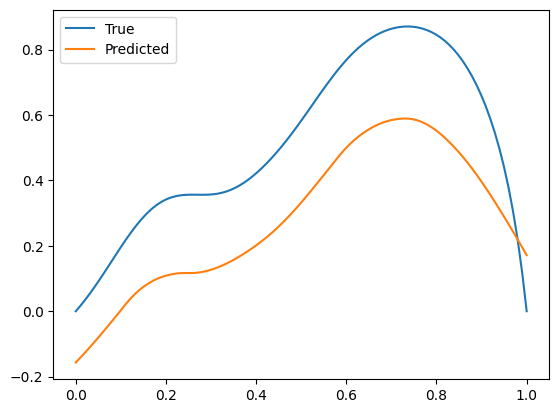

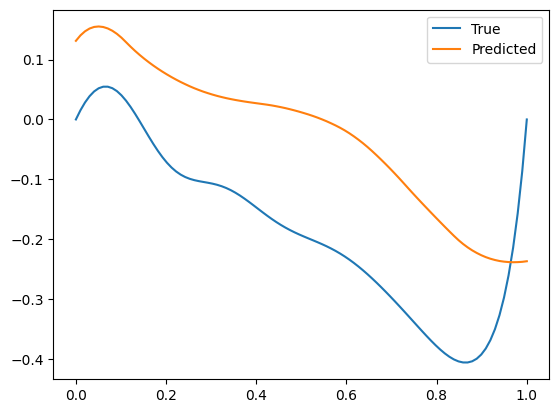

In [ ]:
# then we can test the model
mu_test, xs_test, sol_test = get_mu_xs_sol(folder_path,0.2,training=False)

preds = model.predict(mu_test, xs_test)
for i in range(20):
    plt.plot(xs_test[i,:],sol_test[i,:], label='True')
    plt.plot(xs_test[i,:],preds[i,:], label='Predicted')
    plt.legend()
    plt.show()